## Assignment 3 

### 2018122007 변수현
#### Goal : learn about the model evalation techniques 

### 0. Prepare DATA

In [1]:
import numpy as np
import pandas as pd

import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
#input data
directmail = pd.read_csv('directmail.csv')

In [3]:
#preprocessing data
directmail = directmail.dropna().reset_index(drop=True)

directmail['MARRIED'] = directmail['MARRIED'].astype('int')
directmail['OWNHOME'] = directmail['OWNHOME'].astype('int')

directmail = pd.get_dummies(directmail, columns=['GENDER'], drop_first=True)

In [4]:
directmail.head()

,RESPOND,AGE,BUY18,CLIMATE,FICO,INCOME,MARRIED,OWNHOME,GENDER_M
0,0,71.0,1,10,719.0,67.0,1,0,1
1,0,53.0,0,10,751.0,72.0,1,0,1
2,0,53.0,1,10,725.0,70.0,1,0,0
3,0,45.0,1,10,684.0,56.0,0,0,0
4,0,32.0,0,10,651.0,66.0,0,0,0


### 1. First divide the data into two pieces using 50:50 proportion: one for training and the other for test. (Use the last four digit of your ID as the seed number and use 50:50 proportion)

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
y = directmail["RESPOND"]
train, test = train_test_split(directmail, test_size=0.5, random_state=2007, stratify=y)

In [7]:
print(len(train),len(test))

4863 4864


### 2. Fit the (1) Full Logistic Regression, (2) Backward selection Logistic Regression using AIC.

#### (1) Full Logistic Regression
* 모든 X변수를 이용하여 fitting 시킨 logistic regression 모델임
* fitting 결과를 통해 Income, Gender_m을 제외한 age,buy18,climate,fico,ownhome,married가 p-value 0.05이하로, 종속변수에 유의미한 영향을 끼치는 변수임을 알 수 있음

In [8]:
model1 = smf.glm(formula='RESPOND ~ AGE+BUY18+CLIMATE+FICO+INCOME+OWNHOME+MARRIED+GENDER_M',
               data=train, family=sm.families.Binomial())  
results1 = model1.fit()

In [9]:
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                RESPOND   No. Observations:                 4863
Model:                            GLM   Df Residuals:                     4854
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1240.8
Date:                Sun, 25 Apr 2021   Deviance:                       2481.6
Time:                        20:00:48   Pearson chi2:                 4.84e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.0848      1.337      3.054      0.002       1.464       6.706
AGE           -0.0370      0.006     -5.773      0.000      -0.050      -0.024
BUY18          0.4639      0.082      5.679      0.000       0.304       0.624
CLIMATE       -0.0168      0.009     -1.921      0.055      -0.034       0.000
FICO          -0.0069      0.002     -3.709      0.000      -0.011      -0.003
INCOME        -0.0060      0.004     -1.702      0.089      -0.013       0.001
OWNHOME       -0.3824      0.128     -2.983      0.003      -0.634      -0.131
MARRIED        0.5531      0.129      4.303      0.000       0.301       0.805
GENDER_M       0.0072      0.113      0.064      0.949      -0.215       0.229
==============================================================================
"""

#### (2) Backward selection Logistic Regression using AIC
* AIC기준으로 backward selection을 진행했을 때 선택된 최종 변수는 'AGE', 'BUY18', 'CLIMATE', 'FICO','INCOME' 'MARRIED', 'OWNHOME'임. 

In [10]:
import feature_selection as fsel

In [11]:
X = train.drop(['RESPOND'], axis=1)
y = train['RESPOND']

In [12]:
#AIC 기준으로 backward selection
fsel.backwardSelection(X, y, model_type='logistic', elimination_criteria='aic')  

Character Variables (Dummies Generated, First Dummies Dropped): []
Optimization terminated successfully.
         Current function value: 0.255148
         Iterations 7
Eliminated : GENDER_M
Optimization terminated successfully.
         Current function value: 0.255148
         Iterations 7
Eliminated : INCOME
Optimization terminated successfully.
         Current function value: 0.255455
         Iterations 7
Regained :  INCOME
                           Logit Regression Results                           
Dep. Variable:                RESPOND   No. Observations:                 4863
Model:                          Logit   Df Residuals:                     4855
Method:                           MLE   Df Model:                            7
Date:                Sun, 25 Apr 2021   Pseudo R-squ.:                 0.04083
Time:                        20:00:49   Log-Likelihood:                -1240.8
converged:                       True   LL-Null:                       -1293.6
Covariance Ty

['intercept',
 'AGE',
 'BUY18',
 'CLIMATE',
 'FICO',
 'INCOME',
 'MARRIED',
 'OWNHOME']

In [13]:
#선택된 변수로 구성된 모형 fitting 
model2 = smf.glm(formula='RESPOND ~ BUY18 + AGE + MARRIED + OWNHOME + FICO +INCOME+ CLIMATE',
               data=train, family=sm.families.Binomial())
results2 = model2.fit()

In [14]:
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                RESPOND   No. Observations:                 4863
Model:                            GLM   Df Residuals:                     4855
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1240.8
Date:                Sun, 25 Apr 2021   Deviance:                       2481.6
Time:                        20:00:49   Pearson chi2:                 4.84e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.0860      1.337      3.056      0.002       1.465       6.707
BUY18          0.4639      0.082      5.678      0.000       0.304       0.624
AGE           -0.0369      0.006     -5.774      0.000      -0.049      -0.024
MARRIED        0.5528      0.128      4.304      0.000       0.301       0.805
OWNHOME       -0.3828      0.128     -2.989      0.003      -0.634      -0.132
FICO          -0.0069      0.002     -3.708      0.000      -0.011      -0.003
INCOME        -0.0059      0.003     -1.727      0.084      -0.013       0.001
CLIMATE       -0.0168      0.009     -1.924      0.054      -0.034       0.000
==============================================================================
"""

### 3. Draw a (non-cumulative) Lift Chart using Python for the test data (use % Response as the Y-axis). (Do not use Python packages)

* model1, model2를 이용한 확률 예측

In [15]:
prob_pred1 = results1.predict(test)
prob_pred2 = results2.predict(test)

* scored data만들기 

In [16]:
scored_dat1 = pd.concat([test['RESPOND'],prob_pred1],axis=1)
scored_dat1.columns=['Actual','Predicted']

In [17]:
#구매확률이 높은 순서로 인덱스 지정
scored_dat1 = scored_dat1.sort_values(by='Predicted', ascending=False)
scored_dat1= scored_dat1.reset_index(drop=True)

In [18]:
#분위 지정 
n = int(0.1*len(scored_dat1))

decile =(list(np.repeat(1,n))+
         list(np.repeat(2,n))+
         list(np.repeat(3,n))+
         list(np.repeat(4,n))+
         list(np.repeat(5,n))+
         list(np.repeat(6,n))+
        list(np.repeat(7,n))+
        list(np.repeat(8,n))+
        list(np.repeat(9,n))+
        list(np.repeat(10,len(scored_dat1)-9*n)))

In [19]:
scored_dat1["decile"] = decile

In [20]:
print(len(decile))
print(len(scored_dat1))

4864
4864


In [21]:
scored_dat1

,Actual,Predicted,decile
0,0,0.450852,1
1,0,0.379937,1
2,1,0.375052,1
3,0,0.357114,1
4,0,0.355302,1
...,...,...,...
4859,0,0.012717,10
4860,0,0.012018,10
4861,0,0.011863,10
4862,0,0.010863,10


##### scored_dat2

In [22]:
scored_dat2 = pd.concat([test['RESPOND'],prob_pred2],axis=1)
scored_dat2.columns=['Actual','Predicted']

In [23]:
#구매확률이 높은 순서로 인덱스 지정
scored_dat2 = scored_dat2.sort_values(by='Predicted', ascending=False)
scored_dat2= scored_dat2.reset_index(drop=True)

In [24]:
#decile 추가 
scored_dat2["decile"] = decile

In [25]:
scored_dat2

,Actual,Predicted,decile
0,0,0.451775,1
1,0,0.378760,1
2,1,0.373873,1
3,0,0.356312,1
4,0,0.356018,1
...,...,...,...
4859,0,0.012688,10
4860,0,0.011984,10
4861,0,0.011827,10
4862,0,0.010850,10


* lift chart (y = %response , non-cumulative)


In [26]:
chart1 = scored_dat1.groupby("decile").agg({"Predicted": "count","Actual":"sum"})
chart1.columns = ["# of customers","Freq of buy"]
chart1["%Response"]=chart1["Freq of buy"]/chart1["# of customers"]*100

In [27]:
chart2 = scored_dat2.groupby("decile").agg({"Predicted": "count","Actual":"sum"})
chart2.columns = ["# of customers","Freq of buy"]
chart2["%Response"]=chart2["Freq of buy"]/chart2["# of customers"]*100

In [28]:
chart1

,# of customers,Freq of buy,%Response
decile,,,
1,486,75,15.432099
2,486,58,11.934156
3,486,45,9.259259
4,486,29,5.967078
5,486,35,7.201646
6,486,39,8.024691
7,486,24,4.938272
8,486,30,6.172840
9,486,14,2.880658


In [29]:
chart2

,# of customers,Freq of buy,%Response
decile,,,
1,486,75,15.432099
2,486,58,11.934156
3,486,45,9.259259
4,486,31,6.378601
5,486,33,6.790123
6,486,38,7.818930
7,486,26,5.349794
8,486,29,5.967078
9,486,14,2.880658


* Draw a non-cumulative lift chart using %Response as Y-axis

In [30]:
import matplotlib.pyplot as plt

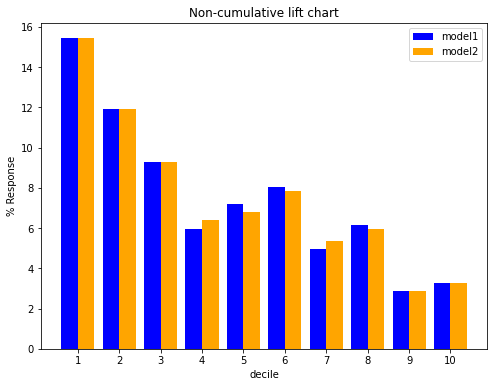

In [31]:
#model1 ,2
plt.figure(figsize=(8, 6))

x = np.array([1,2,3,4,5,6,7,8,9,10])

plt.bar(x-0.2,chart1["%Response"],width = 0.4,label = "model1",color ="blue")
plt.bar(x+0.2,chart2["%Response"],width = 0.4,label = "model2",color ="orange")
plt.xticks([1,2,3,4,5,6,7,8,9,10])
plt.title("Non-cumulative lift chart")
plt.xlabel("decile")
plt.ylabel("% Response")
plt.legend(["model1","model2"])

plt.show()

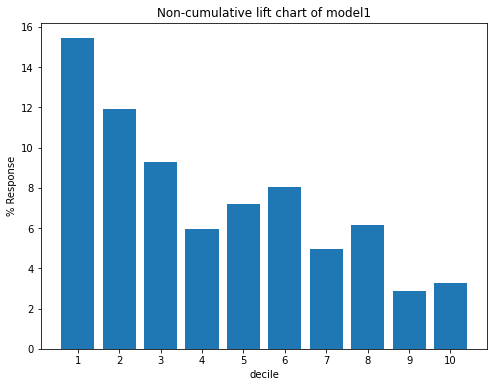

In [32]:
#model 1
plt.figure(figsize=(8, 6))

plt.bar(chart1.index,chart1["%Response"],alpha=1)
plt.xticks([1,2,3,4,5,6,7,8,9,10])
plt.title("Non-cumulative lift chart of model1")
plt.xlabel("decile")
plt.ylabel("% Response")

plt.show()

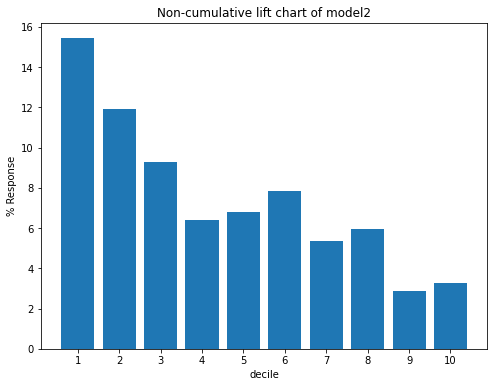

In [33]:
#model 2
plt.figure(figsize=(8, 6))

plt.bar(chart2.index,chart2["%Response"],alpha=1)
plt.xticks([1,2,3,4,5,6,7,8,9,10])
plt.title("Non-cumulative lift chart of model2")
plt.xlabel("decile")
plt.ylabel("% Response")

plt.show()

### 4. Draw a (cumulative) Lift Chart using Python for the test data (use %Captured Response as the Y-axis). (Do not use Python packages)

* lift chart (y = %captured response ,cumulative)

In [34]:
cum_chart1 = chart1.drop(["# of customers","%Response"],axis=1)
cum_chart1["cum Freq"] = chart1["Freq of buy"].cumsum()
cum_chart1["%Captured Response"] = round(cum_chart1["cum Freq"]/365*100,2)

In [35]:
cum_chart2 = chart2.drop(["# of customers","%Response"],axis=1)
cum_chart2["cum Freq"] = chart2["Freq of buy"].cumsum()
cum_chart2["%Captured Response"] = round(cum_chart2["cum Freq"]/365*100,2)

In [36]:
cum_chart1

,Freq of buy,cum Freq,%Captured Response
decile,,,
1,75,75,20.55
2,58,133,36.44
3,45,178,48.77
4,29,207,56.71
5,35,242,66.30
6,39,281,76.99
7,24,305,83.56
8,30,335,91.78
9,14,349,95.62


In [37]:
cum_chart2

,Freq of buy,cum Freq,%Captured Response
decile,,,
1,75,75,20.55
2,58,133,36.44
3,45,178,48.77
4,31,209,57.26
5,33,242,66.30
6,38,280,76.71
7,26,306,83.84
8,29,335,91.78
9,14,349,95.62


* Draw a cumulative lift chart using %captured Resonse as Y-axis 

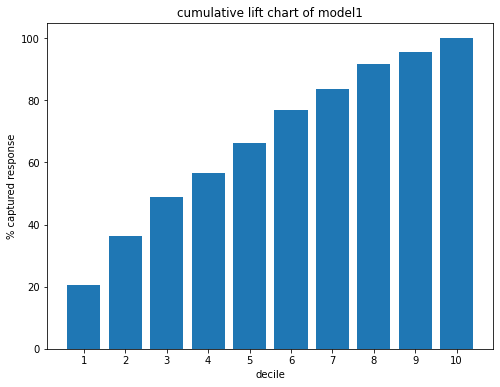

In [38]:
#model1 
plt.figure(figsize=(8, 6))

plt.bar(cum_chart1.index,cum_chart1["%Captured Response"],alpha=1)
plt.xticks([1,2,3,4,5,6,7,8,9,10])
plt.title("cumulative lift chart of model1")
plt.xlabel("decile")
plt.ylabel("% captured response")

plt.show()

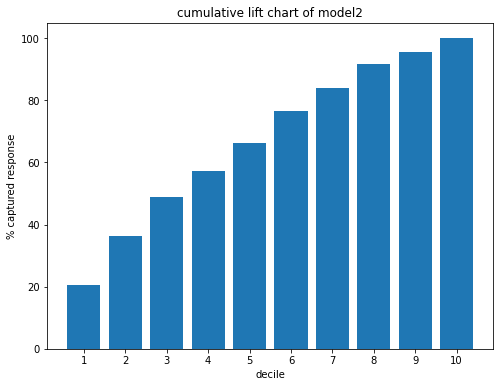

In [39]:
#model2
plt.figure(figsize=(8, 6))

plt.bar(cum_chart2.index,cum_chart2["%Captured Response"],alpha=1)
plt.xticks([1,2,3,4,5,6,7,8,9,10])
plt.title("cumulative lift chart of model2")
plt.xlabel("decile")
plt.ylabel("% captured response")

plt.show()

In [40]:
[np.repeat(365,10)]

[array([365, 365, 365, 365, 365, 365, 365, 365, 365, 365])]

### 5. Calculate the Accuracy Ratio of the two models. (Do not use Python packages)
* model1의 AR은 0.273임
* model2의 AR은 0.2718임

In [41]:
#완벽한 누적 Captured Response (1분위에서 모든 구매자 365명 검출)
perfect_cum_per=[0]+list(np.repeat(100,10))

In [42]:
#최악의 경우의 누적 %Captured Response
worst_cum_per = list(range(0,101,10))

In [43]:
print(perfect_cum_per)
print(worst_cum_per)

[0, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]


* draw CAP for model 1 ,2 

In [44]:
x = [0,1,2,3,4,5,6,7,8,9,10]

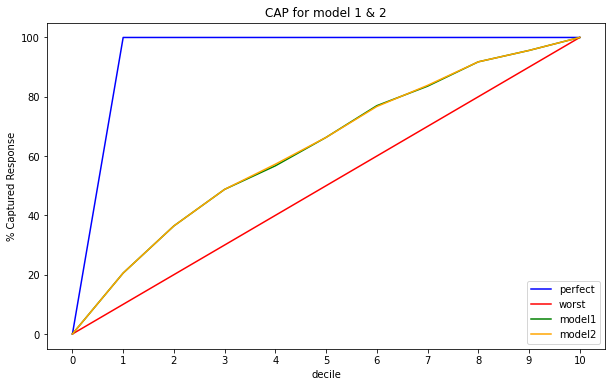

In [45]:
#CAP for model 1 and 2
plt.figure(figsize=(10, 6))

plt.plot(x,perfect_cum_per,color="blue")
plt.plot(x,worst_cum_per,color="red")
plt.plot(x,[0]+list(cum_chart1["%Captured Response"]),color="green")
plt.plot(x,[0]+list(cum_chart2["%Captured Response"]),color="orange")
plt.xticks(x)
plt.title("CAP for model 1 & 2")
plt.xlabel("decile")
plt.ylabel("% Captured Response")
plt.legend(["perfect","worst","model1","model2"])
plt.show()

* calculating AR for model 1&2 

In [46]:
area_perfect = 9*100*0.5
area_perfect

450.0

In [47]:
diff1 = [0]+list(cum_chart1["%Captured Response"])-np.array(worst_cum_per)
diff1 = list(diff1)

area = 0 
for i in x[:-1] :
    s = (diff1[i] + diff1[i+1])* 0.5
    area = area + s
    
    
AR1 = area / area_perfect

In [48]:
diff2 = [0]+list(cum_chart2["%Captured Response"])-np.array(worst_cum_per)
diff2 = list(diff2)

area = 0 
for i in x[:-1] :
    s = (diff2[i] + diff2[i+1])* 0.5
    area = area + s

AR2 = area / area_perfect

In [49]:
print(AR1)
print(AR2)

0.2816
0.2828222222222222


### 6. Which model would you choose?

model 2 (AR이 더 크기 때문)

### 7. Using the model that you chose in #6, draw a (cumulative) Profit Chart using Python for the validation data under the following conditions.
* Fixed cost  = 5,000 (dollar)  
* Cost per mailing = 7 (dollars) 
* Profit for each purchase = 100(dollars)
#### NOTE: Calculate profits for the company (not for a person).

In [55]:
profit_chart = chart2.drop("%Response",axis=1)

In [56]:
profit_chart["cum customer"] = chart2["# of customers"].cumsum()
profit_chart["cum Freq of buy"] = chart2["Freq of buy"].cumsum()

In [57]:
profit_chart["cum_cost"] = 5000 + 7 *profit_chart["cum customer"]
profit_chart["cum_income"] = 100 * profit_chart["cum Freq of buy"]
profit_chart["cum_profit"] = profit_chart["cum_income"]-profit_chart["cum_cost"]

In [58]:
profit_chart

,# of customers,Freq of buy,cum customer,cum Freq of buy,cum_cost,cum_income,cum_profit
decile,,,,,,,
1,486,75,486,75,8402,7500,-902
2,486,58,972,133,11804,13300,1496
3,486,45,1458,178,15206,17800,2594
4,486,31,1944,209,18608,20900,2292
5,486,33,2430,242,22010,24200,2190
6,486,38,2916,280,25412,28000,2588
7,486,26,3402,306,28814,30600,1786
8,486,29,3888,335,32216,33500,1284
9,486,14,4374,349,35618,34900,-718


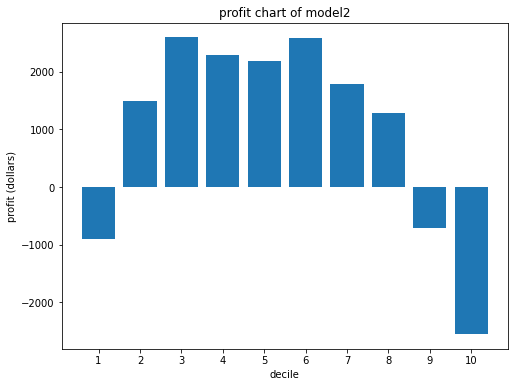

In [60]:
#profit chart of model2
plt.figure(figsize=(8, 6))

plt.bar(profit_chart.index,profit_chart["cum_profit"],alpha=1)
plt.xticks([1,2,3,4,5,6,7,8,9,10])
plt.title("profit chart of model2")
plt.xlabel("decile")
plt.ylabel("profit (dollars)")

plt.show()

### 8. Suggetst the proportion of 'likely-to-buy' customers to mail out the mailings, using the result in #7.

30%